In [1]:
%matplotlib inline 

In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

import numpy as np

from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
# calculate accuracy measures and confusion matrix
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")


In [3]:
df = pd.read_excel("Election_data.xlsx",sheet_name='Election_Dataset_Two Classes')

In [77]:
df1 = pd.read_excel("Election_data.xlsx",sheet_name='Election_Dataset_Two Classes')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
Unnamed: 0                 1525 non-null int64
vote                       1525 non-null object
age                        1525 non-null int64
economic.cond.national     1525 non-null int64
economic.cond.household    1525 non-null int64
Blair                      1525 non-null int64
Hague                      1525 non-null int64
Europe                     1525 non-null int64
political.knowledge        1525 non-null int64
gender                     1525 non-null object
dtypes: int64(8), object(2)
memory usage: 119.2+ KB


In [311]:
df1.shape

(1525, 10)

In [313]:
df.describe()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
count,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000
mean,0.696770,54.241266,3.257416,3.159196,3.335531,2.749506,6.740277,1.540541,0.467370
std,0.459805,15.701741,0.853647,0.886279,1.174772,1.232479,3.299043,1.084417,0.499099
min,0.000000,24.000000,1.500000,1.500000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000,0.000000
50%,1.000000,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000,0.000000
75%,1.000000,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000,1.000000
max,1.000000,93.000000,5.000000,5.000000,5.000000,5.000000,11.000000,3.000000,1.000000


In [317]:
df1[df1.gender == 0]

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender


In [5]:
df = df.iloc[:,1:]

In [6]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [7]:
df.shape

(1525, 9)

# Removing dumplicates

In [8]:
df.duplicated().sum()

8

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.shape

(1517, 9)

# Missing Values

In [11]:
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

# Univeriate Analysis of categorical data

In [12]:
print(df['vote'].nunique())
print(df['vote'].value_counts().sort_values())

2
Conservative     460
Labour          1057
Name: vote, dtype: int64


In [13]:
print(df['political.knowledge'].nunique())
print(df['political.knowledge'].value_counts())

4
2    776
0    454
3    249
1     38
Name: political.knowledge, dtype: int64


In [14]:
print(df['gender'].nunique())
print(df['gender'].value_counts().sort_values())

2
male      709
female    808
Name: gender, dtype: int64


In [15]:
print(df['economic.cond.national'].nunique())
print(df['economic.cond.national'].value_counts().sort_values())

5
1     37
5     82
2    256
4    538
3    604
Name: economic.cond.national, dtype: int64


# Visualizing data

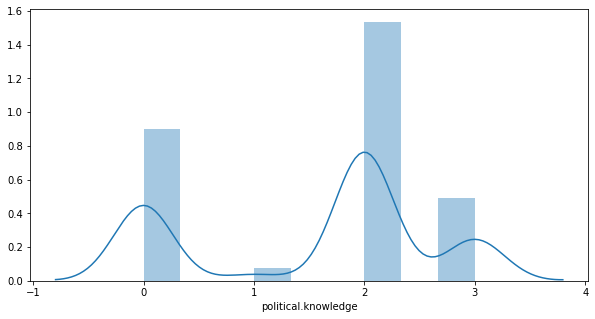

In [16]:
plt.rcParams['figure.figsize'] = [10,5]
sns.distplot(df['political.knowledge'],norm_hist = bool)

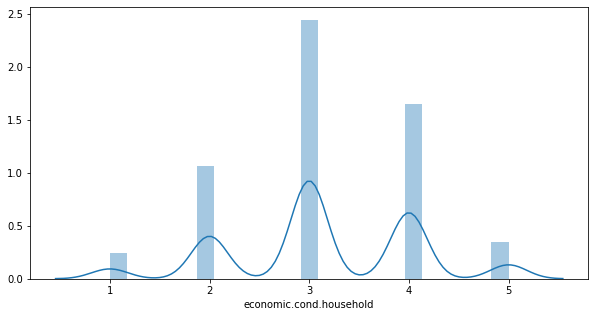

In [17]:
plt.rcParams['figure.figsize'] = [10,5]
sns.distplot(df['economic.cond.household'])

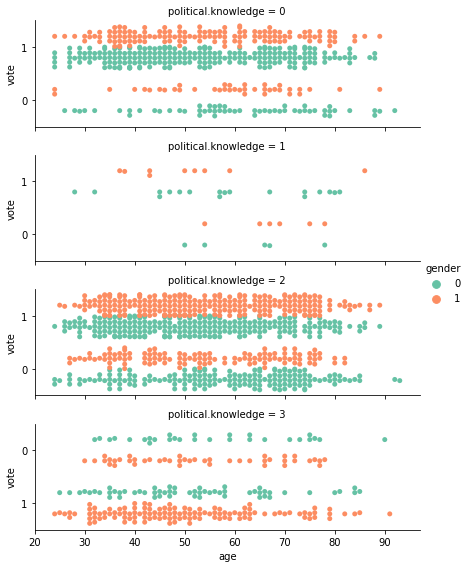

In [312]:
sns.catplot(x="age", y="vote",
                hue="gender", row="political.knowledge",
                data=df,
                orient="h", height=2, aspect=3, palette="Set2",
                kind="swarm", dodge=True)

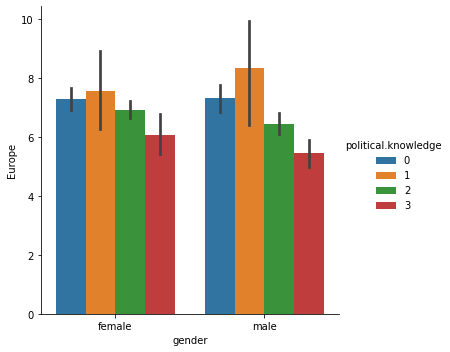

In [19]:
sns.catplot(x="gender", y="Europe", hue="political.knowledge", kind="bar", data=df);

In [20]:
df['vote'] = pd.Categorical(df['vote']).codes

In [80]:
df1.vote.astype('category').cat.categories

Index(['Conservative', 'Labour'], dtype='object')

In [81]:
df1.gender.astype('category').cat.categories

Index(['female', 'male'], dtype='object')

In [21]:
df['gender'] = pd.Categorical(df['gender']).codes

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

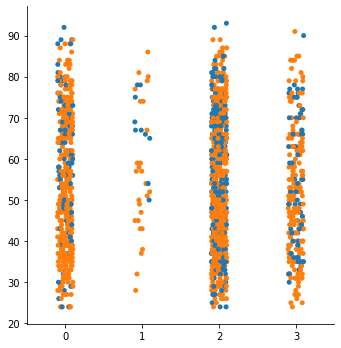

In [22]:
sns.catplot(x = df['political.knowledge'], y = df['age'], hue =df['vote'] ,data=df);

Text(0, 0.5, 'count')

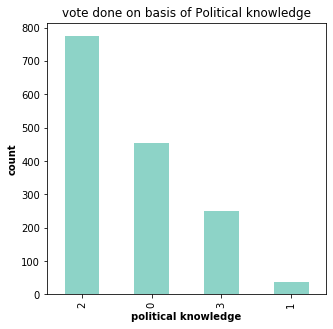

In [23]:
plt.rcParams['figure.figsize'] = [5,5]

ax=df['political.knowledge'].value_counts().plot(kind='bar',stacked=True,colormap = 'Set3')
ax.title.set_text('vote done on basis of Political knowledge')
plt.xlabel("political knowledge",fontweight = 'bold')
plt.ylabel("count",fontweight = 'bold')

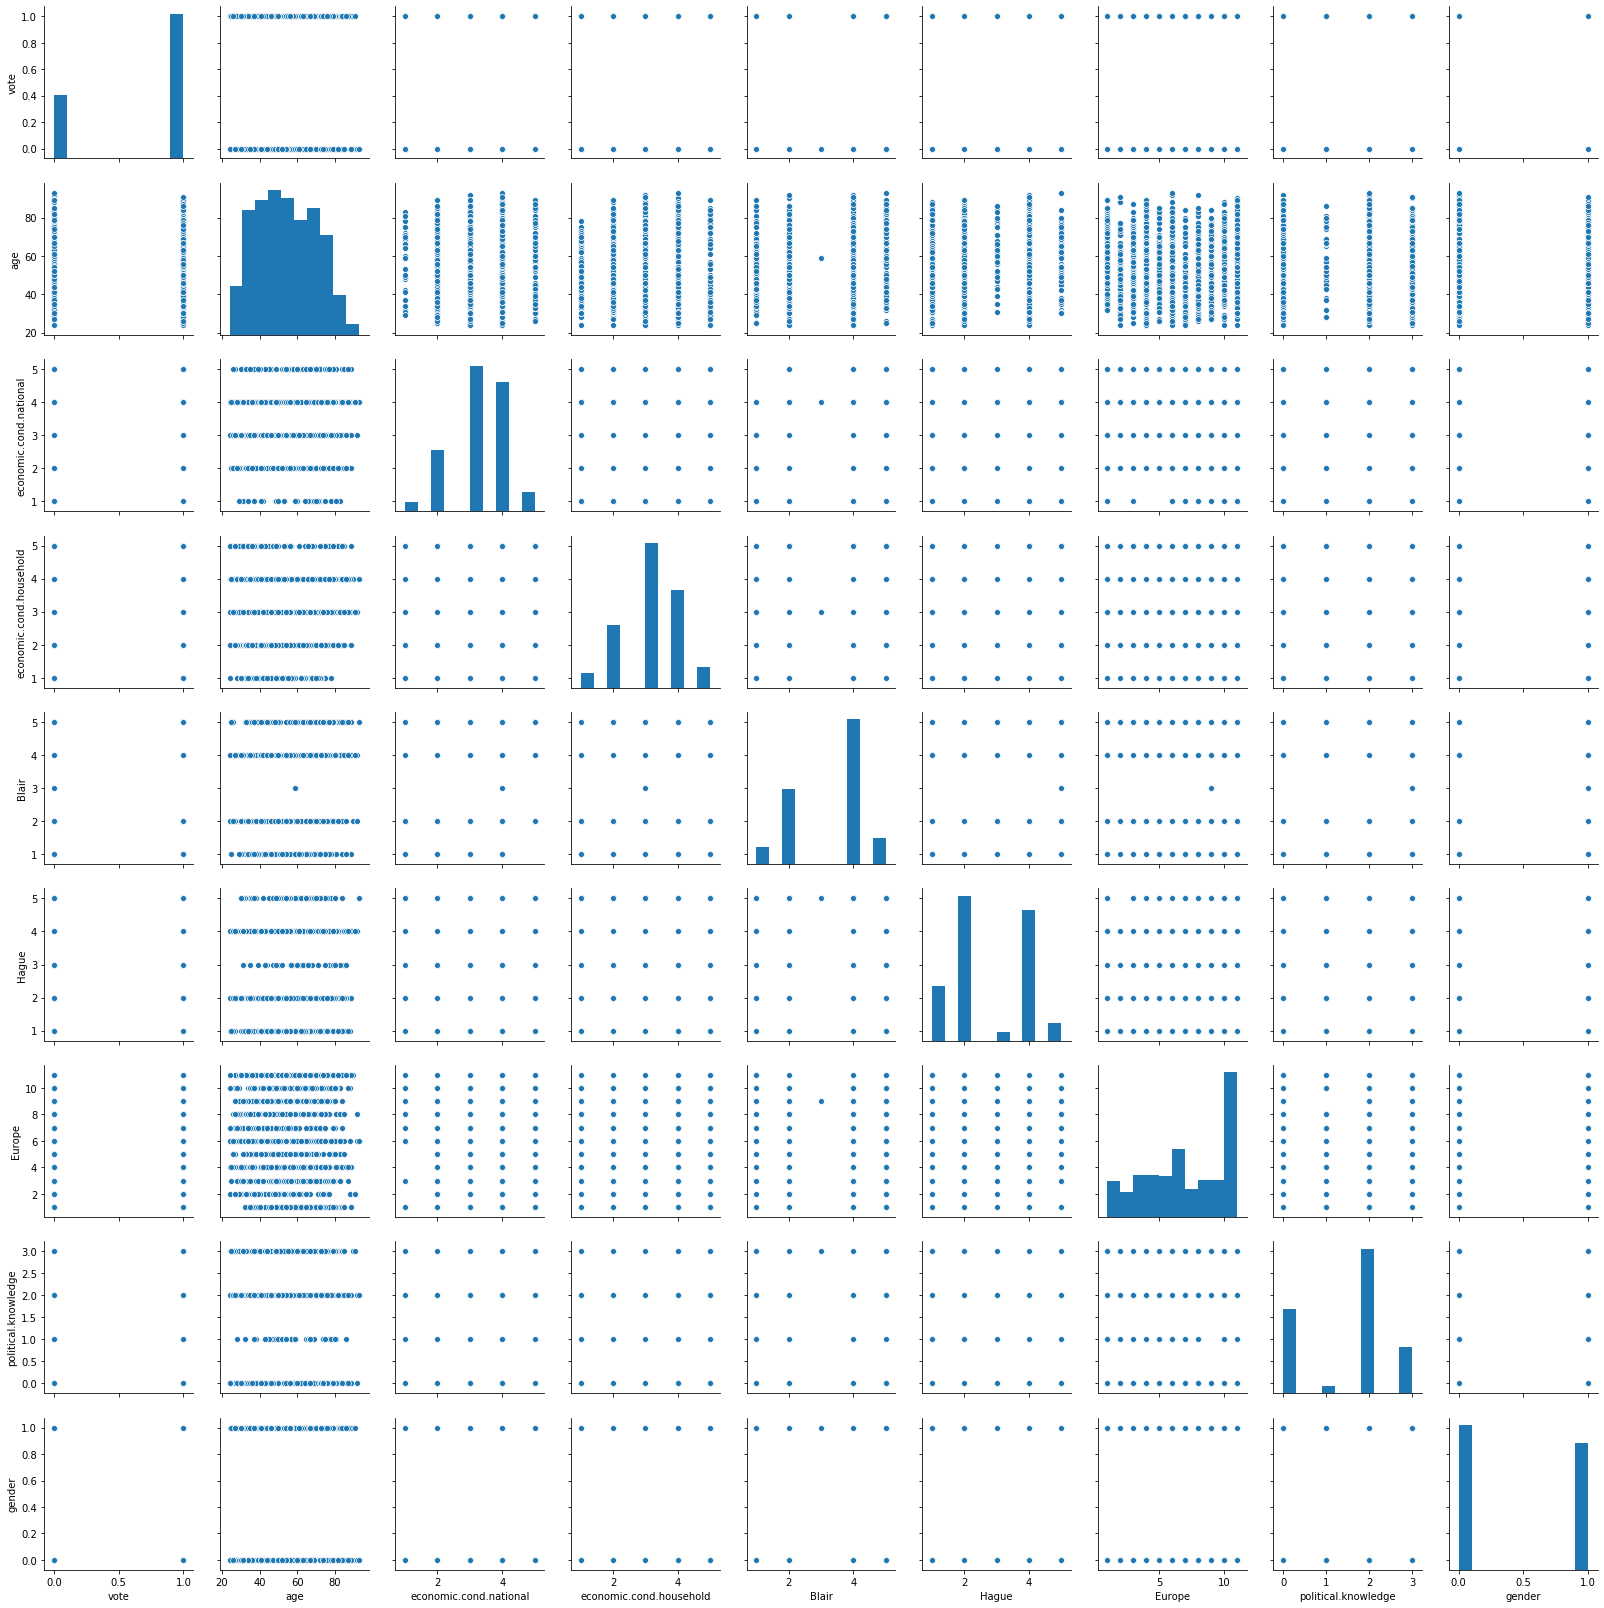

In [33]:
#Visualising Numeric Variables
#Pairplot of all the numeric variables
plt.rcParams['figure.figsize'] = [15,8]
ax = sns.pairplot(df)

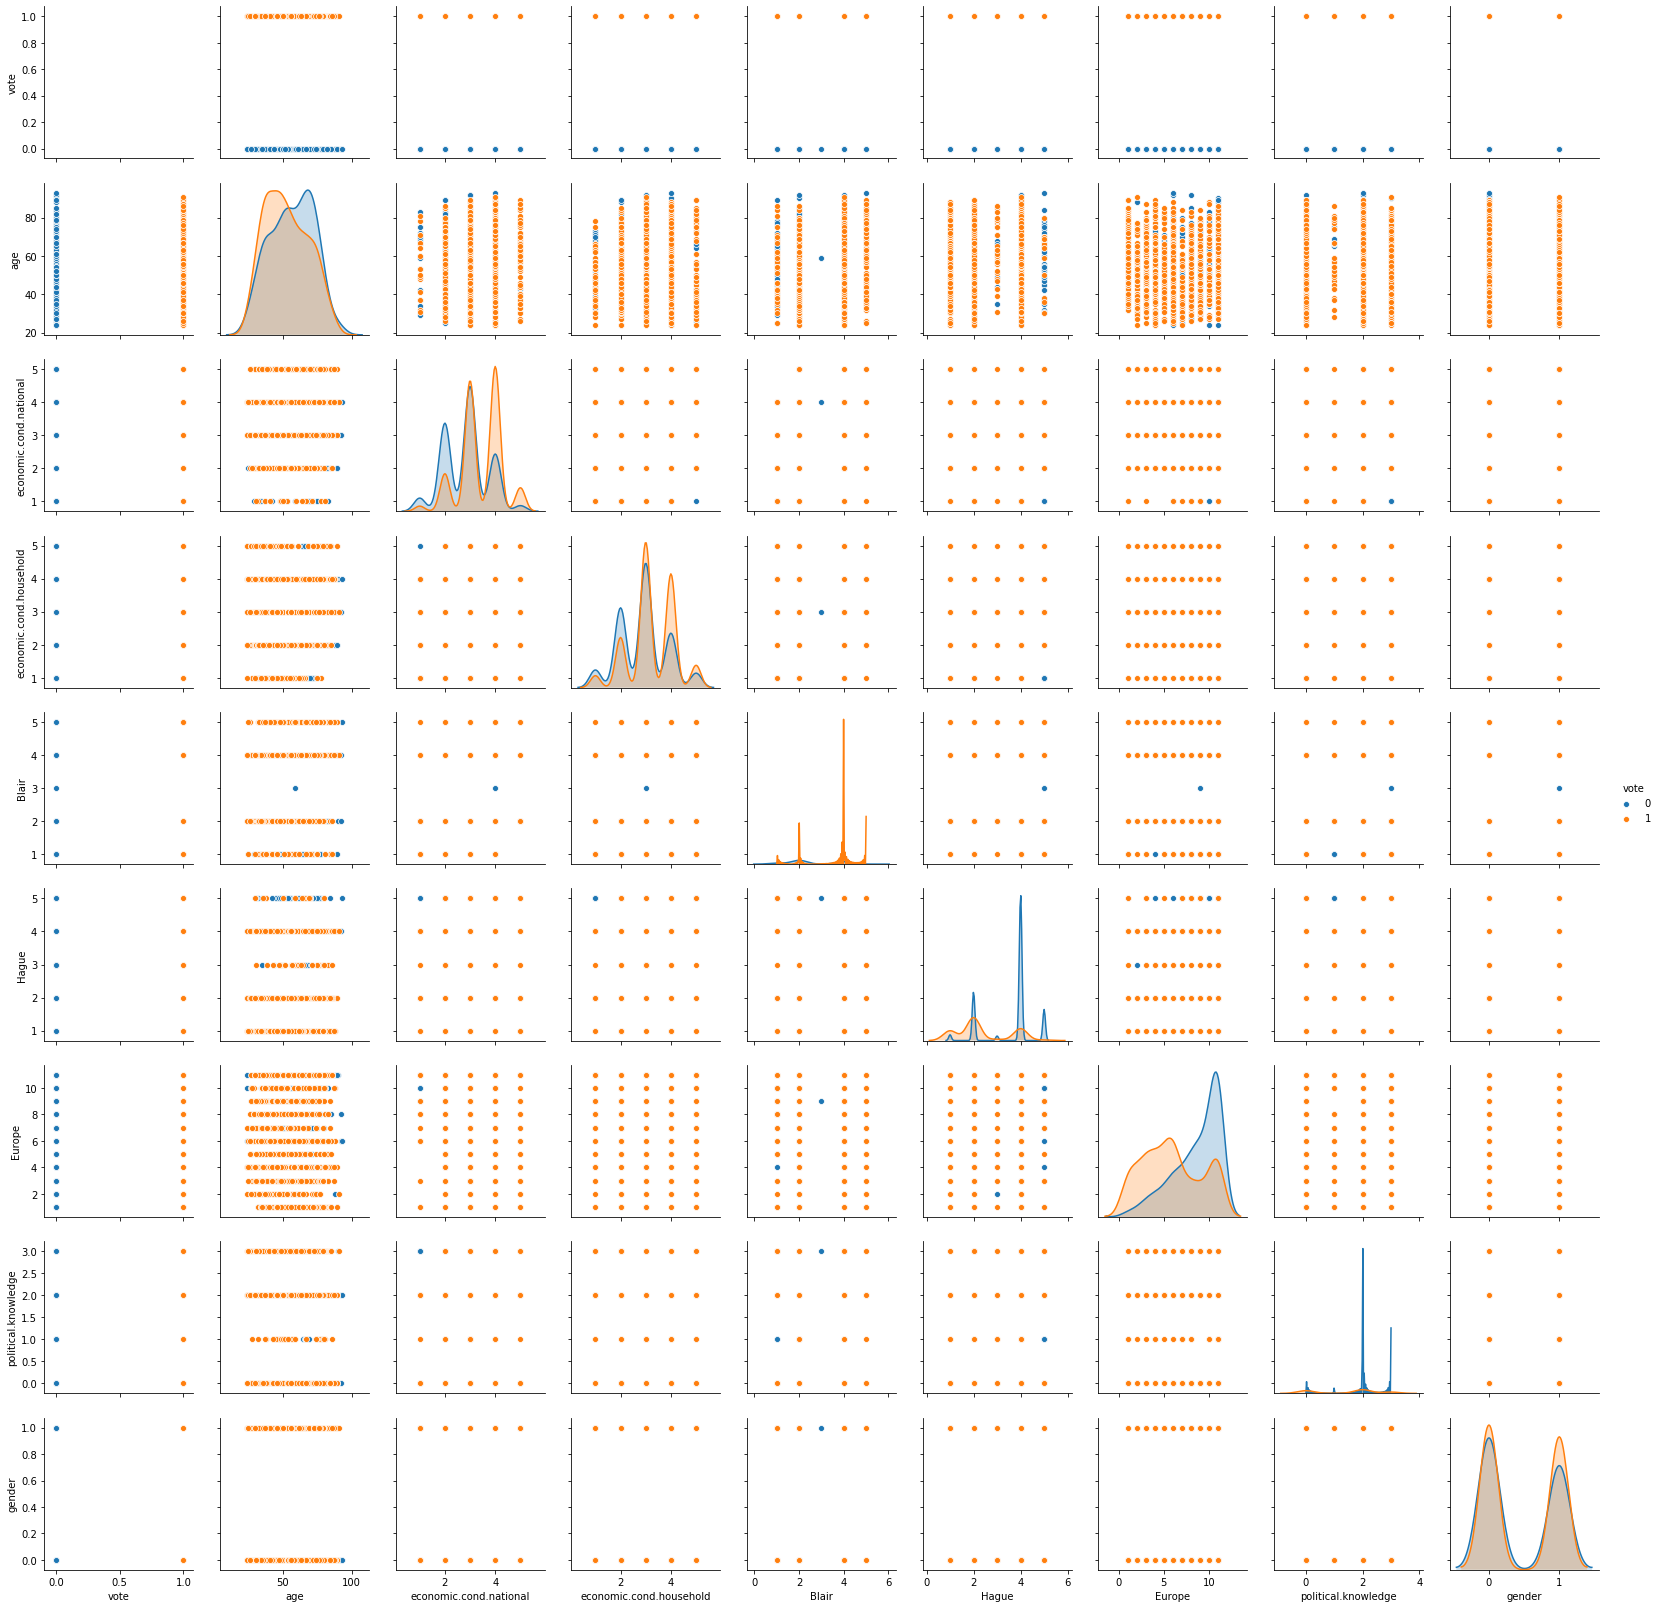

In [34]:
#Visualising Numeric Variables
#Pairplot of all the numeric variables
plt.rcParams['figure.figsize'] = [15,8]
ax = sns.pairplot(df,hue = 'vote')

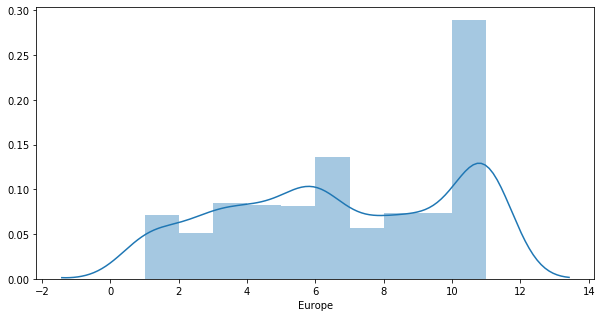

In [318]:
plt.rcParams['figure.figsize'] = [10,5]
sns.distplot(df['Europe'],norm_hist = bool,)

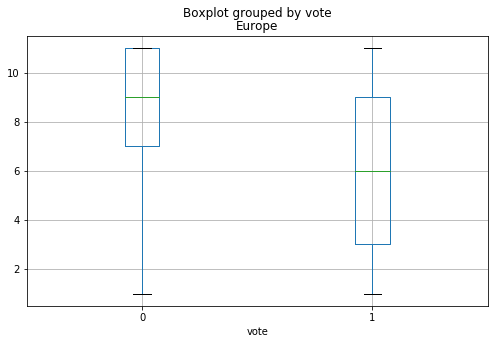

In [329]:
df.boxplot(column="Europe",        # Column to plot
                 by= "vote",         # Column to split upon
                 figsize= (8,5))

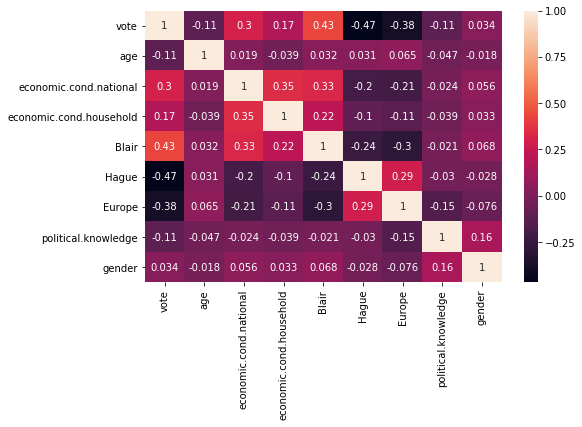

In [35]:
plt.rcParams['figure.figsize'] = [8,5]
sns.heatmap(df.corr(), annot=True)

# Treating Categorical values 

 Method 1 - Label encoding

In [ ]:
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
df['gender'] = label_encoder.fit_transform((df['gender'].astype(str)))
df['vote'] = label_encoder.fit_transform((df['vote'].astype(str)))


Method -2 pd.Categorical

In [27]:
df['gender'] = pd.Categorical(df['gender']).codes
df['vote'] = pd.Categorical(df['vote']).codes

In [ ]:
df.info()

# Outliers handling

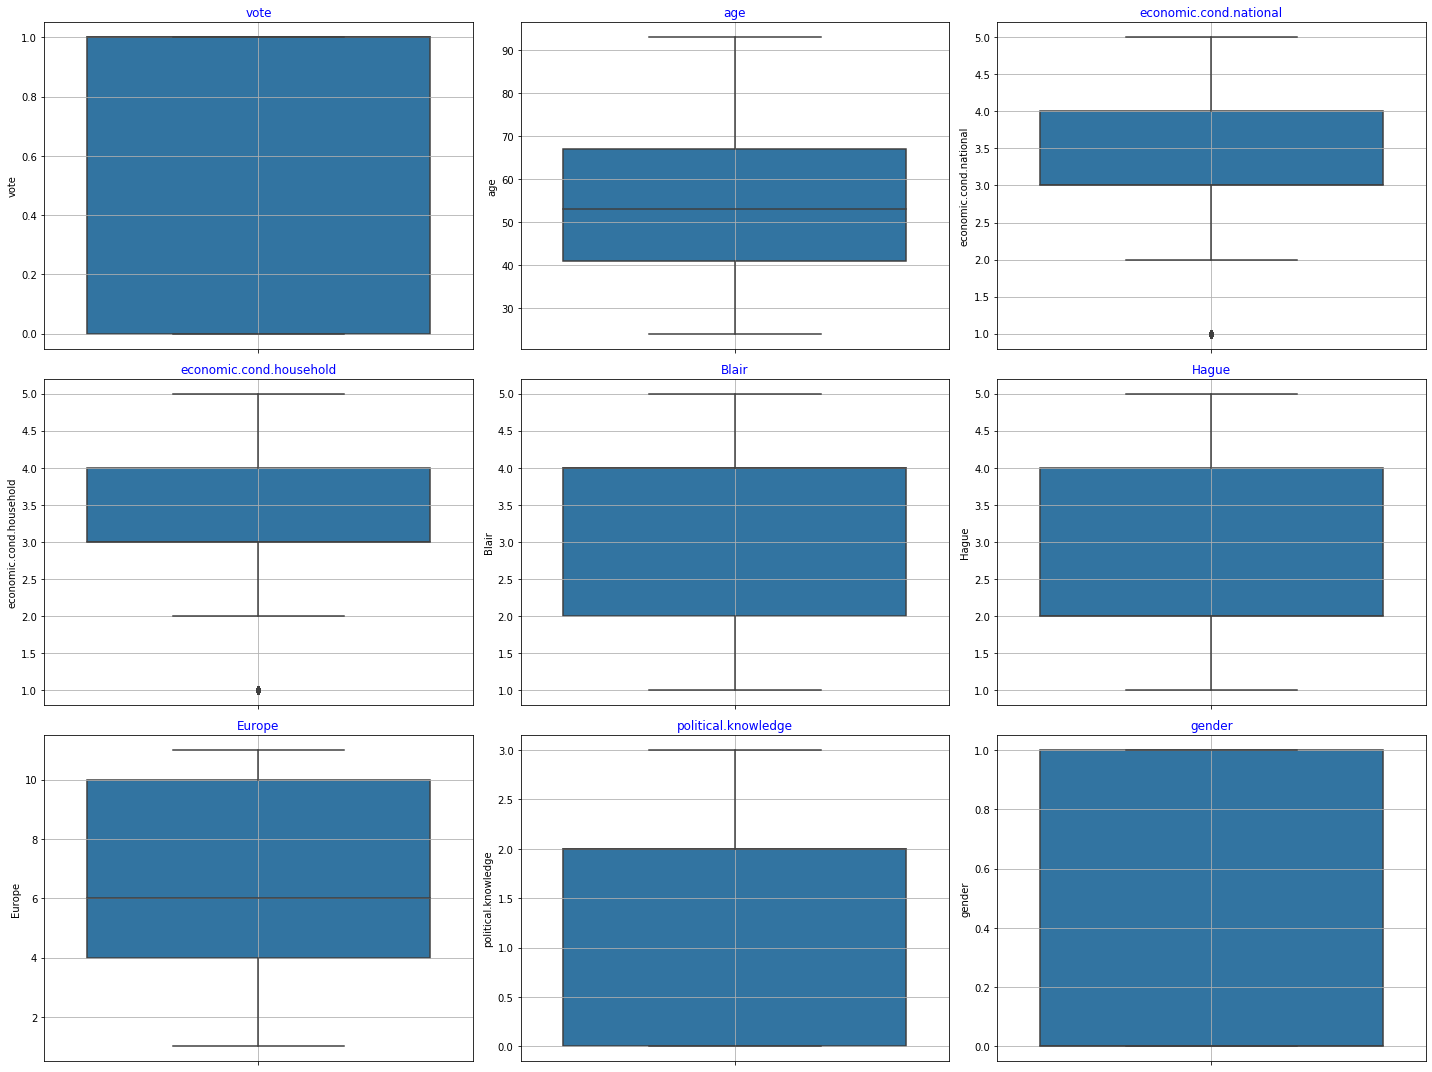

In [32]:
continuous=df.dtypes[(df.dtypes=='int64')|(df.dtypes=='float64')|(df.dtypes=='int8')].index

fig=plt.figure(figsize=(20,15))
for i in range(0,len(continuous)):
    ax=fig.add_subplot(3,3,i+1)
    sns.boxplot(y=df[continuous[i]])
    ax.set_title(df.columns[i],color='Blue')
    plt.grid()
plt.tight_layout()

In [36]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [37]:
for i, j in zip(np.where(df < Q1 - 1.5 * IQR)[0], np.where(df < Q1 - 1.5 * IQR)[1]): 
    
    whisker  = Q1 - 1.5 * IQR
    df.iloc[i,j] = whisker[j]
    
        
#Replace every outlier on the upper side by the upper whisker    
for i, j in zip(np.where(df > Q3 + 1.5 * IQR)[0], np.where(df > Q3 + 1.5 * IQR)[1]):
    
    whisker  = Q3 + 1.5 * IQR
    df.iloc[i,j] = whisker[j]
    

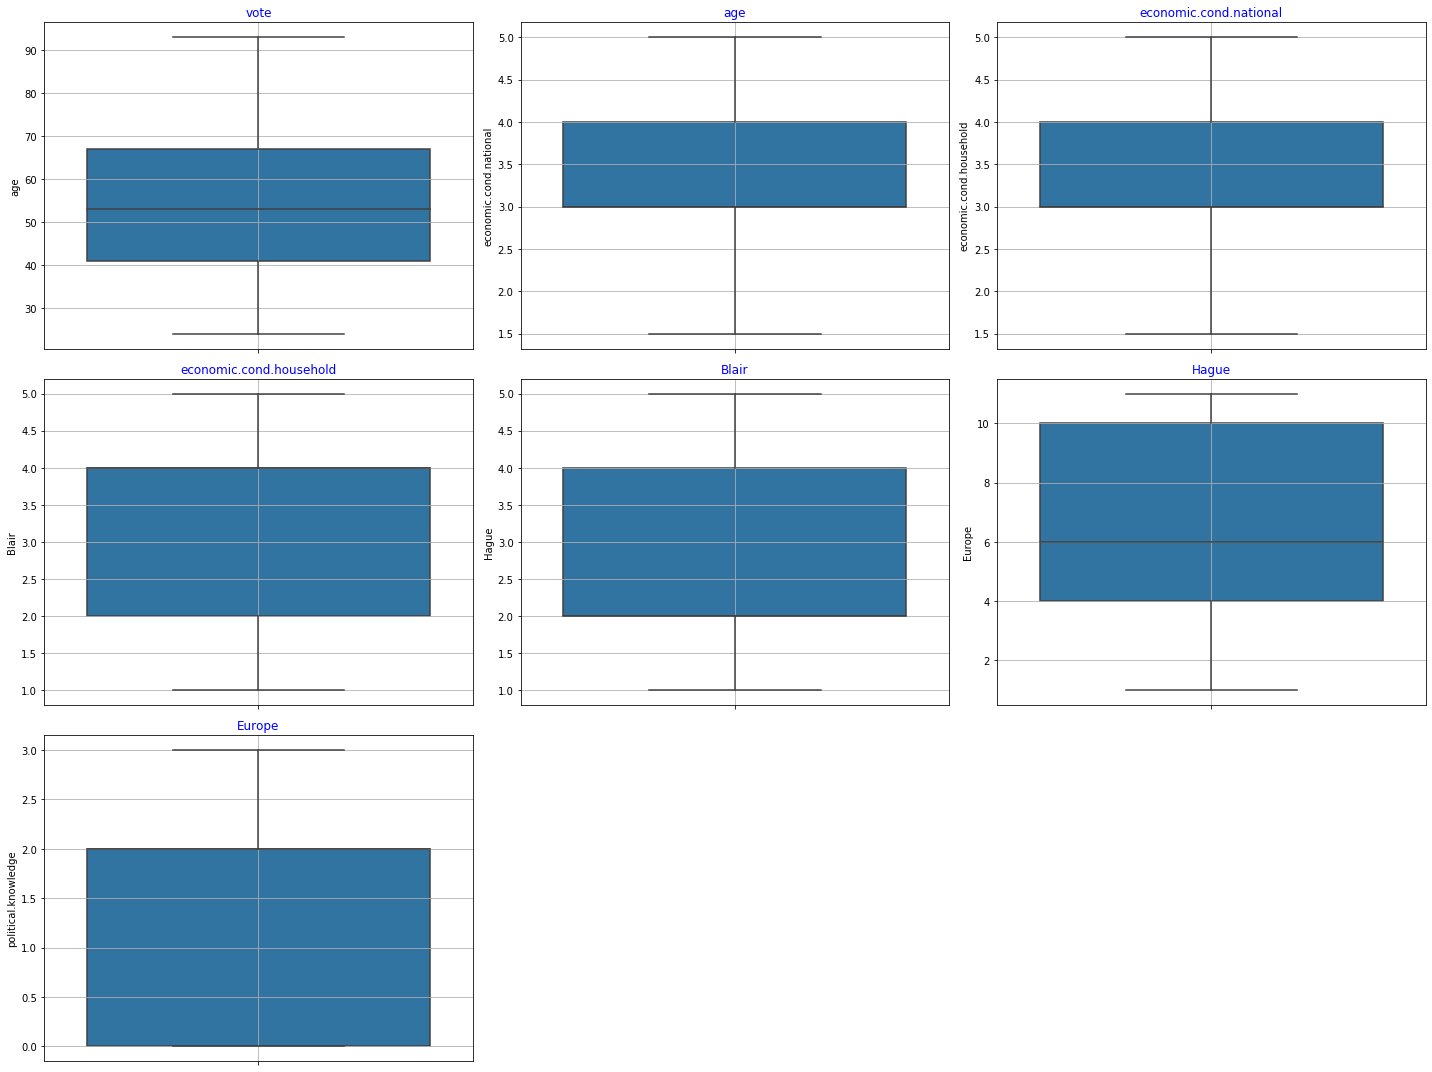

In [39]:
cont=df.dtypes[(df.dtypes=='int64')|(df.dtypes=='float64')].index

fig=plt.figure(figsize=(20,15))
for i in range(0,len(cont)):
    ax=fig.add_subplot(3,3,i+1)
    sns.boxplot(y=df[cont[i]])
    ax.set_title(df.columns[i],color='Blue')
    plt.grid()
plt.tight_layout()

# Split data

In [40]:
X = df.drop( ['vote'] , axis =1)
Y = df['vote']

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=21)
type(X_train)

pandas.core.frame.DataFrame

In [42]:
Y_train.count()

1061

In [43]:
Y_test.count()

456


# Logestic Regression

In [44]:

from sklearn.linear_model import Ridge, Lasso

In [133]:
# Fit the model on original data i.e. before upsampling
LogRmodel = LogisticRegression()
LogRmodel.fit(X_train, Y_train)
Y_Text_Predict_LogR = LogRmodel.predict(X_test)

In [146]:
Y_Train_Predict_LogR = LogRmodel.predict(X_train)

In [148]:
LogRmodel_score_train = LogRmodel.score(X_train, Y_Train_Predict_LogR)
LogRmodel_score_test = LogRmodel.score(X_test, Y_Text_Predict_LogR)

print("Model Score for Test Data ", LogRmodel_score_test)
print("Model Score for Train Data ", LogRmodel_score_train)
print("---------------------Test LogR Model-------------------------")
print(metrics.confusion_matrix(Y_test, Y_Text_Predict_LogR))
print(metrics.classification_report(Y_test, Y_Text_Predict_LogR))
print("---------------------Train LogR Model-------------------------")
print(metrics.confusion_matrix(Y_train, Y_Train_Predict_LogR))
print(metrics.classification_report(Y_train, Y_Train_Predict_LogR))

Model Score for Test Data  1.0
Model Score for Train Data  1.0
---------------------Test LogR Model-------------------------
[[ 93  36]
 [ 30 297]]
              precision    recall  f1-score   support

           0       0.76      0.72      0.74       129
           1       0.89      0.91      0.90       327

    accuracy                           0.86       456
   macro avg       0.82      0.81      0.82       456
weighted avg       0.85      0.86      0.85       456

---------------------Train LogR Model-------------------------
[[218 113]
 [ 70 660]]
              precision    recall  f1-score   support

           0       0.76      0.66      0.70       331
           1       0.85      0.90      0.88       730

    accuracy                           0.83      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.82      0.83      0.82      1061



------------ Test LR-------------


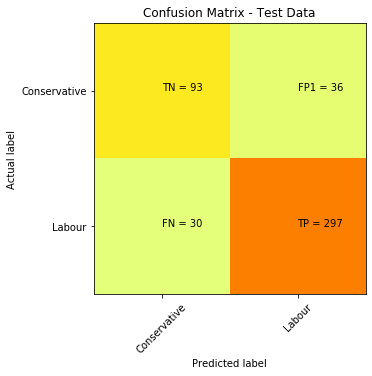

In [174]:
print("------------ Test LR-------------")
cm = metrics.confusion_matrix(Y_test,Y_Text_Predict_LogR)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Conservative', 'Labour']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN', 'FP1'],['FN','TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

------------ Train LR-------------


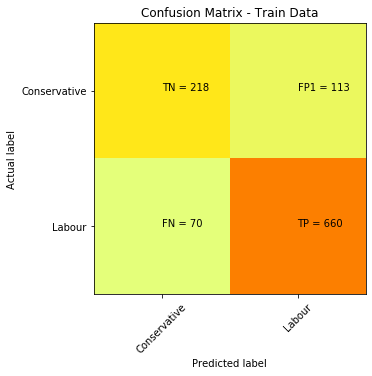

In [175]:
print("------------ Train LR-------------")
cm = metrics.confusion_matrix(Y_train,Y_Train_Predict_LogR)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Conservative', 'Labour']
plt.title('Confusion Matrix - Train Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN', 'FP1'],['FN','TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

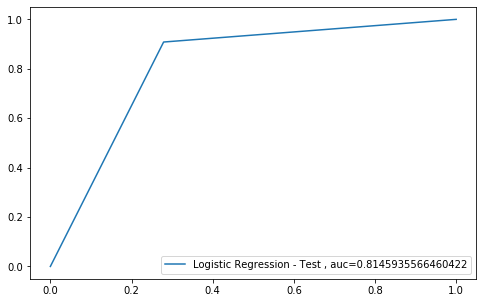

In [160]:
fpr_LR, tpr_LR, thresholds_LR = metrics.roc_curve(Y_test, Y_Text_Predict_LogR)
auc_LR_test = metrics.roc_auc_score(Y_test, Y_Text_Predict_LogR)
plt.plot(fpr_LR,tpr_LR,label="Logistic Regression - Test , auc="+str(auc_LR_test))
plt.legend(loc=4)
plt.show()

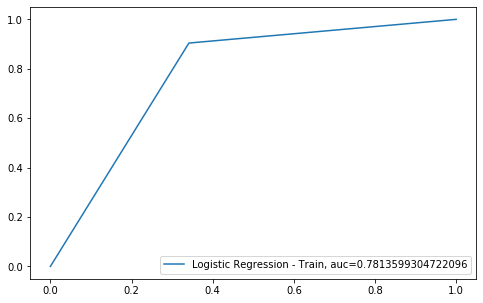

In [161]:
fpr_LR_train, tpr_LR_train, thresholds_LR_train = metrics.roc_curve(Y_train, Y_Train_Predict_LogR)
auc_LR_tain = metrics.roc_auc_score(Y_train, Y_Train_Predict_LogR)
plt.plot(fpr_LR_train,tpr_LR_train,label="Logistic Regression - Train, auc="+str(auc_LR_tain))
plt.legend(loc=4)
plt.show()

In [103]:
print(metrics.confusion_matrix(Y_test,Y_pred_LR.round()))

[[ 92  37]
 [ 30 297]]


In [110]:
print(metrics.classification_report(Y_test,Y_pred_LR.round()))

              precision    recall  f1-score   support

           0       0.75      0.71      0.73       129
           1       0.89      0.91      0.90       327

    accuracy                           0.85       456
   macro avg       0.82      0.81      0.82       456
weighted avg       0.85      0.85      0.85       456



# LR - Scaled

In [162]:
#Scales the data. Essentially returns the z-scores of every attribute

from sklearn.preprocessing import StandardScaler
stdScaler = StandardScaler()
X_train_scaled_data = stdScaler.fit_transform(X_train)

In [163]:
X_train_scaled_data = stdScaler.fit_transform(X_train)

In [164]:
X_test_scaled_data = stdScaler.fit_transform(X_test)

In [165]:
# Fit the model on original data i.e. before upsampling
LogRmodel_s = LogisticRegression()
LogRmodel_s.fit(X_train_scaled_data, Y_train)

Y_Test_Predict_LogR_s = LogRmodel_s.predict(X_test_scaled_data)
Y_Train_Predict_LogR_s = LogRmodel_s.predict(X_train_scaled_data)

In [166]:
LogRmodel_score_train_s = LogRmodel.score(X_train_scaled_data, Y_Train_Predict_LogR_s)
LogRmodel_score_test_s = LogRmodel.score(X_test_scaled_data, Y_Test_Predict_LogR_s)

print("Model Score for Test Data ", LogRmodel_score_test_s)
print("Model Score for Train Data ", LogRmodel_score_train_s)
print("---------------------Test LogR Model-------------------------")
print(metrics.confusion_matrix(Y_test, Y_Test_Predict_LogR_s))
print(metrics.classification_report(Y_test, Y_Test_Predict_LogR_s))
print("---------------------Train LogR Model-------------------------")
print(metrics.confusion_matrix(Y_train, Y_Train_Predict_LogR_s))
print(metrics.classification_report(Y_train, Y_Train_Predict_LogR_s))

Model Score for Test Data  0.831140350877193
Model Score for Train Data  0.8180961357210179
---------------------Test LogR Model-------------------------
[[ 95  34]
 [ 34 293]]
              precision    recall  f1-score   support

           0       0.74      0.74      0.74       129
           1       0.90      0.90      0.90       327

    accuracy                           0.85       456
   macro avg       0.82      0.82      0.82       456
weighted avg       0.85      0.85      0.85       456

---------------------Train LogR Model-------------------------
[[217 114]
 [ 70 660]]
              precision    recall  f1-score   support

           0       0.76      0.66      0.70       331
           1       0.85      0.90      0.88       730

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.82      0.83      0.82      1061



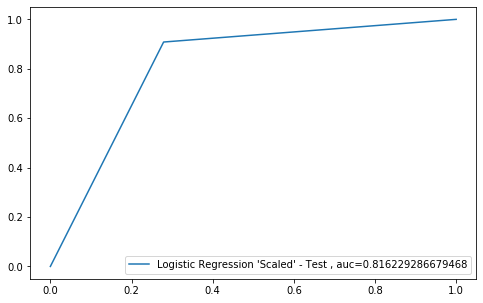

In [168]:
fpr_LR_s, tpr_LR_s, thresholds_LR_s = metrics.roc_curve(Y_test, Y_Test_Predict_LogR_s)
auc_LR_test_s = metrics.roc_auc_score(Y_test, Y_Test_Predict_LogR_s)
plt.plot(fpr_LR,tpr_LR,label="Logistic Regression 'Scaled' - Test , auc="+str(auc_LR_test_s))
plt.legend(loc=4)
plt.show()

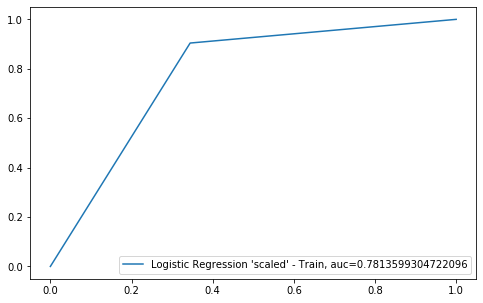

In [169]:
fpr_LR_train_s, tpr_LR_train_s, thresholds_LR_train_s = metrics.roc_curve(Y_train, Y_Train_Predict_LogR_s)
auc_LR_tain_s = metrics.roc_auc_score(Y_train, Y_Train_Predict_LogR)
plt.plot(fpr_LR_train_s,tpr_LR_train_s,label="Logistic Regression 'scaled' - Train, auc="+str(auc_LR_tain_s))
plt.legend(loc=4)
plt.show()

AUC score is the same for scaled data .Hence we can understand there is no use of scaling the data

# LASSO and RIDGE

In [60]:
# Import linear models
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
# Create lasso and ridge objects
lasso = linear_model.Lasso()
ridge = linear_model.Ridge()
# Fit the models
lasso.fit(X_train, Y_train)
ridge.fit(X_train, Y_train)
# Print scores, MSE, and coefficients
print("lasso score --> train:", lasso.score(X_train, Y_train))
print("ridge score--> train :",ridge.score(X_train, Y_train))
print("lasso MSE:", mean_squared_error(Y_test, lasso.predict(X_test)))
print("ridge MSE:", mean_squared_error(Y_test, ridge.predict(X_test)))
print("lasso coef:", lasso.coef_)
print("ridge coef:", ridge.coef_)

lasso score: 0.0
ridge score: 0.3959125453136677
lasso MSE: 0.20371066631962986
ridge MSE: 0.11898059375460796
lasso coef: [-0.  0.  0.  0. -0. -0. -0.  0.]
ridge coef: [-0.00256909  0.06432402  0.01185294  0.10106629 -0.1161002  -0.02969073
 -0.05958633  0.00865921]


In [125]:
Y_lasso_Predict =lasso.predict(X_test)

In [126]:
Y_ridge_Predict =ridge.predict(X_test)

# SMOTE - LR

In [64]:
from imblearn.over_sampling import SMOTE

In [66]:
sm = SMOTE(random_state=2)
x_train_res, y_train_res = sm.fit_sample(X_train, Y_train.ravel())

In [176]:
# invoke the LinearRegression function and find the bestfit model on training data

LR_sm = LogisticRegression()
LR_sm.fit(x_train_res, y_train_res)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [177]:
y_pred_test_LR_sm = LR_sm.predict(X_test)

In [302]:
y_pred_train_LR_sm = LR_sm.predict(x_train_res)

In [307]:
LR_score_train_sm = LR_sm.score(x_train_res,y_train_res)
LR_score_test_sm = LR_sm.score(X_test,Y_test)

print("Model Score for Test Data ", LR_score_test_sm)
print("Model Score for Train Data ", LR_score_train_sm)
print("---------------------Test LR SMOTE Model-------------------------")
print(metrics.confusion_matrix(Y_test, y_pred_test_LR_sm))
print(metrics.classification_report(Y_test, y_pred_test_LR_sm))
print("---------------------Train LR SMOTE Model-------------------------")
print(metrics.confusion_matrix(y_train_res, y_pred_train_LR_sm))
print(metrics.classification_report(y_train_res, y_pred_train_LR_sm))

Model Score for Test Data  0.8464912280701754
Model Score for Train Data  0.8226027397260274
---------------------Test LR SMOTE Model-------------------------
[[108  21]
 [ 49 278]]
              precision    recall  f1-score   support

           0       0.69      0.84      0.76       129
           1       0.93      0.85      0.89       327

    accuracy                           0.85       456
   macro avg       0.81      0.84      0.82       456
weighted avg       0.86      0.85      0.85       456

---------------------Train LR SMOTE Model-------------------------
[[607 123]
 [136 594]]
              precision    recall  f1-score   support

           0       0.82      0.83      0.82       730
           1       0.83      0.81      0.82       730

    accuracy                           0.82      1460
   macro avg       0.82      0.82      0.82      1460
weighted avg       0.82      0.82      0.82      1460



------------ Test LR SMOTE-------------


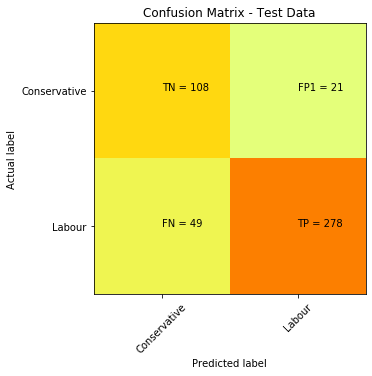

In [184]:
print("------------ Test LR SMOTE-------------")
cm = metrics.confusion_matrix(Y_test,y_pred_test_LR_sm)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Conservative', 'Labour']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN', 'FP1'],['FN','TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

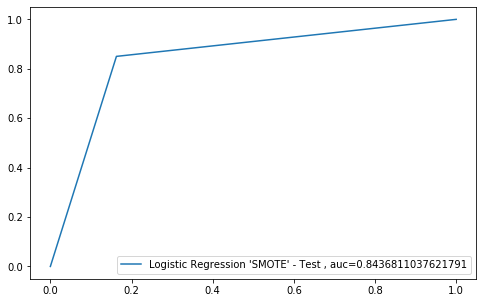

In [186]:
fpr_LR_sm, tpr_LR_sm, thresholds_LR_sm = metrics.roc_curve(Y_test, y_pred_test_LR_sm)
auc_LR_test_sm = metrics.roc_auc_score(Y_test, y_pred_test_LR_sm)
plt.plot(fpr_LR_sm,tpr_LR_sm,label="Logistic Regression 'SMOTE' - Test , auc="+str(auc_LR_test_sm))
plt.legend(loc=4)
plt.show()

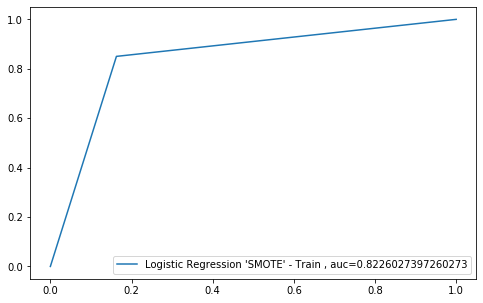

In [305]:
fpr_LR_sm_train, tpr_LR_sm_train, thresholds_LR_sm_train = metrics.roc_curve(y_train_res, y_pred_train_LR_sm)
auc_LR_train_sm = metrics.roc_auc_score(y_train_res, y_pred_train_LR_sm)
plt.plot(fpr_LR_sm,tpr_LR_sm,label="Logistic Regression 'SMOTE' - Train , auc="+str(auc_LR_train_sm))
plt.legend(loc=4)
plt.show()

# Naive Bayes Model

In [62]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [63]:
NB_model = GaussianNB()
NB_model.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [70]:
Y_test_predict_NB = NB_model.predict(X_test)

In [282]:
Y_train_predict_NB = NB_model.predict(X_train)

In [283]:
NB_score_train = NB_model.score(X_train,Y_train)
NB_score_test = NB_model.score(X_test,Y_test)

print("Model Score for Test Data ", NB_score_test)
print("Model Score for Train Data ", NB_score_train)
print("---------------------Test Naive Bayes Model-------------------------")
print(metrics.confusion_matrix(Y_test, Y_test_predict_NB))
print(metrics.classification_report(Y_test, Y_test_predict_NB))
print("---------------------Train Naive Bayes Model-------------------------")
print(metrics.confusion_matrix(Y_train, Y_train_predict_NB))
print(metrics.classification_report(Y_train, Y_train_predict_NB))

Model Score for Test Data  0.8399122807017544
Model Score for Train Data  0.82186616399623
---------------------Test Naive Bayes Model-------------------------
[[ 94  35]
 [ 38 289]]
              precision    recall  f1-score   support

           0       0.71      0.73      0.72       129
           1       0.89      0.88      0.89       327

    accuracy                           0.84       456
   macro avg       0.80      0.81      0.80       456
weighted avg       0.84      0.84      0.84       456

---------------------Train Naive Bayes Model-------------------------
[[232  99]
 [ 90 640]]
              precision    recall  f1-score   support

           0       0.72      0.70      0.71       331
           1       0.87      0.88      0.87       730

    accuracy                           0.82      1061
   macro avg       0.79      0.79      0.79      1061
weighted avg       0.82      0.82      0.82      1061



------------ Test Naive Bayes-------------


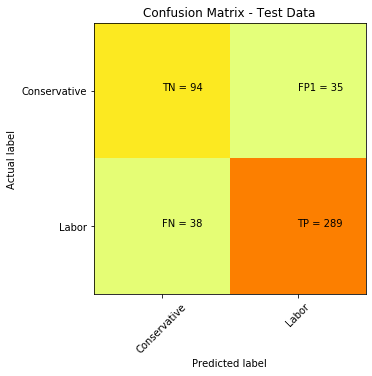

In [106]:
print("------------ Test Naive Bayes-------------")
cm = metrics.confusion_matrix(Y_test,Y_test_predict_NB)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Conservative', 'Labor']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN', 'FP1'],['FN','TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

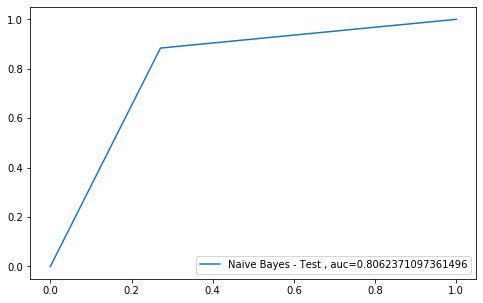

In [191]:
fpr_NB, tpr_NB, thresholds_NB = metrics.roc_curve(Y_test, Y_test_predict_NB)
auc_NB_test = metrics.roc_auc_score(Y_test, Y_test_predict_NB)
plt.plot(fpr_NB,tpr_NB,label="Naive Bayes - Test , auc="+str(auc_NB_test))
plt.legend(loc=4)
plt.show()

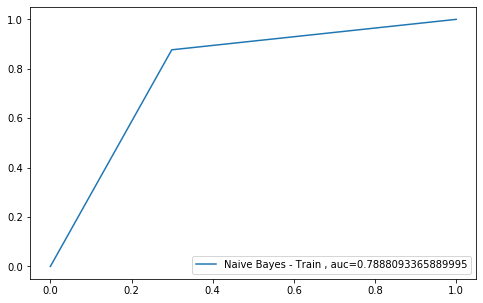

In [286]:

fpr_NB_train, tpr_NB_train, thresholds_NB_train = metrics.roc_curve(Y_train, Y_train_predict_NB)
auc_NB_train = metrics.roc_auc_score(Y_train, Y_train_predict_NB)
plt.plot(fpr_NB_train,tpr_NB_train,label="Naive Bayes - Train , auc="+str(auc_NB_train))
plt.legend(loc=4)
plt.show()

# Smote - NB

In [91]:
NB_model_sm = GaussianNB()
NB_model_sm.fit(x_train_res, y_train_res)

GaussianNB(priors=None, var_smoothing=1e-09)

In [92]:
NB_model_sm.score(x_train_res, y_train_res)

0.8212328767123288

In [188]:
Y_pred_test_NB_sm = NB_model_sm.predict(X_test)

In [279]:
Y_pred_train_NB_sm = NB_model_sm.predict(x_train_res)

------------ Test Naive Bayes SMOTE-------------


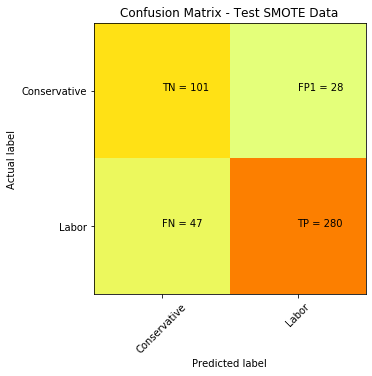

In [189]:
print("------------ Test Naive Bayes SMOTE-------------")
cm = metrics.confusion_matrix(Y_test,Y_pred_test_NB_sm)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Conservative', 'Labor']
plt.title('Confusion Matrix - Test SMOTE Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN', 'FP1'],['FN','TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

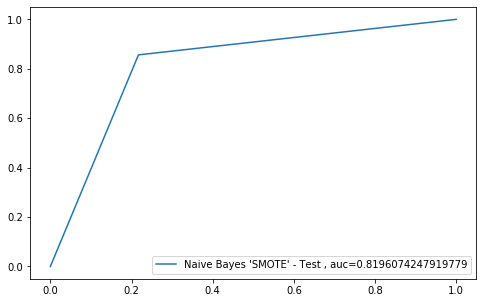

In [190]:
fpr_NB_sm, tpr_NB_sm, thresholds_NB_sm = metrics.roc_curve(Y_test, Y_pred_test_NB_sm)
auc_NB_test_sm = metrics.roc_auc_score(Y_test, Y_pred_test_NB_sm)
plt.plot(fpr_NB_sm,tpr_NB_sm,label="Naive Bayes 'SMOTE' - Test , auc="+str(auc_NB_test_sm))
plt.legend(loc=4)
plt.show()

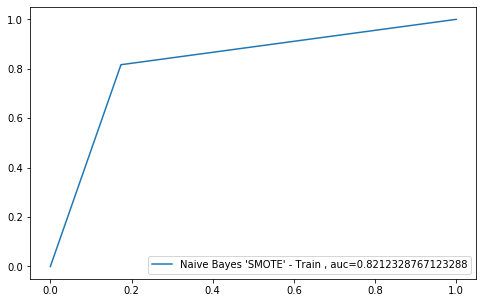

In [281]:
fpr_NB_sm_train, tpr_NB_sm_train, thresholds_NB_sm_train = metrics.roc_curve(y_train_res, Y_pred_train_NB_sm)
auc_NB_train_sm = metrics.roc_auc_score(y_train_res, Y_pred_train_NB_sm)
plt.plot(fpr_NB_sm_train,tpr_NB_sm_train,label="Naive Bayes 'SMOTE' - Train , auc="+str(auc_NB_train_sm))
plt.legend(loc=4)
plt.show()

# LDA

In [195]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [196]:
LDA_model = LinearDiscriminantAnalysis()

In [197]:
LDA_model.fit(X_train,Y_train)

Y_test_pred_LDA = LDA_model.predict(X_test)
Y_train_pred_LDA = LDA_model.predict(X_train)

In [200]:
LDA_score_train = LDA_model.score(X_train,Y_train)
LDA_score_test = LDA_model.score(X_test,Y_test)

print("Model Score for Test Data ", LDA_score_test)
print("Model Score for Train Data ", LDA_score_train)
print("---------------------Test LDA Model-------------------------")
print(metrics.confusion_matrix(Y_test, Y_test_pred_LDA))
print(metrics.classification_report(Y_test, Y_test_pred_LDA))
print("---------------------Train LDA Model-------------------------")
print(metrics.confusion_matrix(Y_train, Y_train_pred_LDA))
print(metrics.classification_report(Y_train, Y_train_pred_LDA))

Model Score for Test Data  0.8552631578947368
Model Score for Train Data  0.82186616399623
---------------------Test LDA Model-------------------------
[[ 95  34]
 [ 32 295]]
              precision    recall  f1-score   support

           0       0.75      0.74      0.74       129
           1       0.90      0.90      0.90       327

    accuracy                           0.86       456
   macro avg       0.82      0.82      0.82       456
weighted avg       0.85      0.86      0.85       456

---------------------Train LDA Model-------------------------
[[221 110]
 [ 79 651]]
              precision    recall  f1-score   support

           0       0.74      0.67      0.70       331
           1       0.86      0.89      0.87       730

    accuracy                           0.82      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.82      0.82      0.82      1061



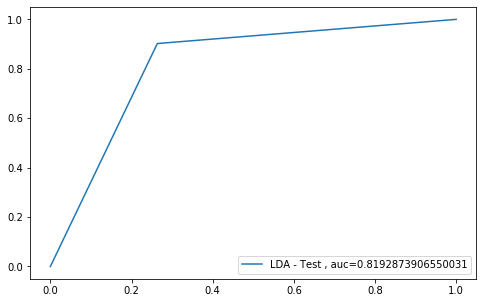

In [201]:
fpr_LDA, tpr_LDA, thresholds_LDA = metrics.roc_curve(Y_test, Y_test_pred_LDA)
auc_LDA_test = metrics.roc_auc_score(Y_test, Y_test_pred_LDA)
plt.plot(fpr_LDA,tpr_LDA,label="LDA - Test , auc="+str(auc_LDA_test))
plt.legend(loc=4)
plt.show()

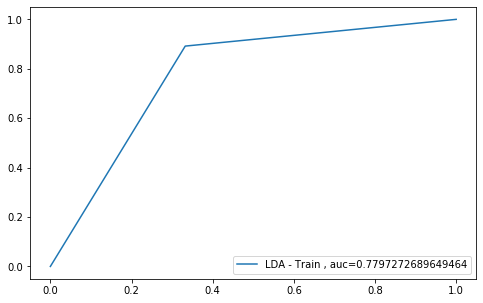

In [203]:
fpr_LDA_train, tpr_LDA_train, thresholds_LDA_train = metrics.roc_curve(Y_train, Y_train_pred_LDA)
auc_LDA_train = metrics.roc_auc_score(Y_train, Y_train_pred_LDA)
plt.plot(fpr_LDA_train,tpr_LDA_train,label="LDA - Train , auc="+str(auc_LDA_train))
plt.legend(loc=4)
plt.show()

# LDA - SMOTE

In [205]:
LDA_model_sm = LinearDiscriminantAnalysis()

In [218]:
LDA_model_sm.fit(x_train_res, y_train_res)

Y_test_pred_LDA_sm = LDA_model_sm.predict(X_test)
Y_train_pred_LDA_sm = LDA_model_sm.predict(x_train_res)

In [225]:
LDA_score_train_sm = LDA_model_sm.score(x_train_res,y_train_res)
LDA_score_test_sm = LDA_model_sm.score(X_test,Y_test)

print("Model Score for Test Data ", LDA_score_test_sm)
print("Model Score for Train Data ", LDA_score_train_sm)
print("---------------------Test LDA SMOTE Model-------------------------")
print(metrics.confusion_matrix(Y_test, Y_test_pred_LDA_sm))
print(metrics.classification_report(Y_test, Y_test_pred_LDA_sm))
print("---------------------Train LDA SMOTE Model-------------------------")
print(metrics.confusion_matrix(y_train_res, Y_train_pred_LDA_sm))
print(metrics.classification_report(y_train_res, Y_train_pred_LDA_sm))

Model Score for Test Data  0.8464912280701754
Model Score for Train Data  0.8226027397260274
---------------------Test LDA SMOTE Model-------------------------
[[108  21]
 [ 49 278]]
              precision    recall  f1-score   support

           0       0.69      0.84      0.76       129
           1       0.93      0.85      0.89       327

    accuracy                           0.85       456
   macro avg       0.81      0.84      0.82       456
weighted avg       0.86      0.85      0.85       456

---------------------Train LDA SMOTE Model-------------------------
[[609 121]
 [138 592]]
              precision    recall  f1-score   support

           0       0.82      0.83      0.82       730
           1       0.83      0.81      0.82       730

    accuracy                           0.82      1460
   macro avg       0.82      0.82      0.82      1460
weighted avg       0.82      0.82      0.82      1460



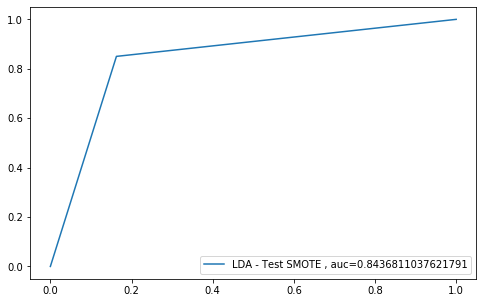

In [227]:
fpr_LDA_sm, tpr_LDA_sm, thresholds_LDA_sm = metrics.roc_curve(Y_test, Y_test_pred_LDA_sm)
auc_LDA_test_sm = metrics.roc_auc_score(Y_test, Y_test_pred_LDA_sm)
plt.plot(fpr_LDA_sm,tpr_LDA_sm,label="LDA - Test SMOTE , auc="+str(auc_LDA_test_sm))
plt.legend(loc=4)
plt.show()

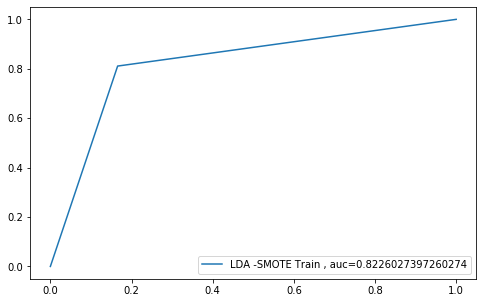

In [226]:
fpr_LDA_train_sm, tpr_LDA_train_sm, thresholds_LDA_train_sm = metrics.roc_curve(y_train_res, Y_train_pred_LDA_sm)
auc_LDA_train_sm = metrics.roc_auc_score(y_train_res, Y_train_pred_LDA_sm)
plt.plot(fpr_LDA_train_sm,tpr_LDA_train_sm,label="LDA -SMOTE Train , auc="+str(auc_LDA_train_sm))
plt.legend(loc=4)
plt.show()

# KNN

In [222]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model = KNeighborsClassifier()
KNN_model.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [223]:
Y_test_pred_KNN = KNN_model.predict(X_test)
Y_train_pred_KNN = KNN_model.predict(X_train)

In [239]:
KNN_score_train = KNN_model.score(X_train,Y_train)
KNN_score_test = KNN_model.score(X_test,Y_test)

print("Model Score for Test Data ", KNN_score_test)
print("Model Score for Train Data ", KNN_score_train)
print("---------------------Test KNN Model-------------------------")
print(metrics.confusion_matrix(Y_test, Y_test_pred_KNN))
print(metrics.classification_report(Y_test, Y_test_pred_KNN))
print("---------------------Train KNN Model-------------------------")
print(metrics.confusion_matrix(Y_train, Y_train_pred_KNN))
print(metrics.classification_report(Y_train, Y_train_pred_KNN))

Model Score for Test Data  0.8026315789473685
Model Score for Train Data  0.8482563619227145
---------------------Test KNN Model-------------------------
[[ 83  46]
 [ 44 283]]
              precision    recall  f1-score   support

           0       0.65      0.64      0.65       129
           1       0.86      0.87      0.86       327

    accuracy                           0.80       456
   macro avg       0.76      0.75      0.76       456
weighted avg       0.80      0.80      0.80       456

---------------------Train KNN Model-------------------------
[[237  94]
 [ 67 663]]
              precision    recall  f1-score   support

           0       0.78      0.72      0.75       331
           1       0.88      0.91      0.89       730

    accuracy                           0.85      1061
   macro avg       0.83      0.81      0.82      1061
weighted avg       0.85      0.85      0.85      1061



In [330]:
pd.crosstab(Y_test, Y_test_pred_KNN)

col_0,0,1
vote,,
0,83,46
1,44,283


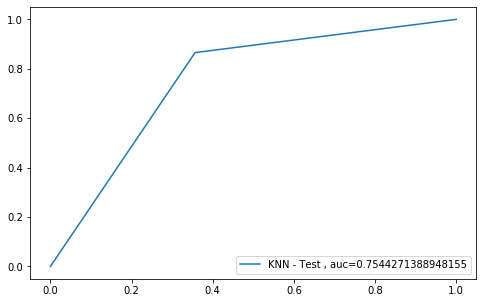

In [240]:
fpr_KNN, tpr_KNN, thresholds_KNN = metrics.roc_curve(Y_test, Y_test_pred_KNN)
auc_KNN_test = metrics.roc_auc_score(Y_test, Y_test_pred_KNN)
plt.plot(fpr_KNN,tpr_KNN,label="KNN - Test , auc="+str(auc_KNN_test))
plt.legend(loc=4)
plt.show()

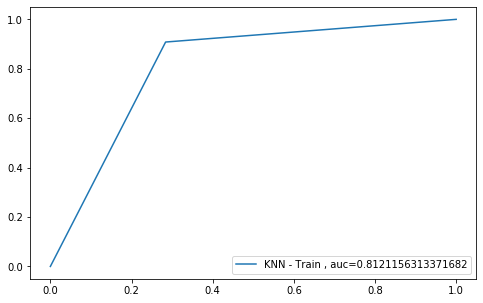

In [238]:
fpr_KNN_train, tpr_KNN_train, thresholds_KNN_train = metrics.roc_curve(Y_train, Y_train_pred_KNN)
auc_KNN_train = metrics.roc_auc_score(Y_train, Y_train_pred_KNN)
plt.plot(fpr_KNN_train,tpr_KNN_train,label="KNN - Train , auc="+str(auc_KNN_train))
plt.legend(loc=4)
plt.show()

# KNN - SMOTE

In [229]:
KNN_SM_model = KNeighborsClassifier()
KNN_SM_model.fit(x_train_res, y_train_res)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [230]:
Y_test_pred_KNN_sm = KNN_SM_model.predict(X_test)
Y_train_pred_KNN_sm = KNN_SM_model.predict(x_train_res)

In [231]:
KNN_score_train_sm = KNN_SM_model.score(x_train_res,y_train_res)
KNN_score_test_sm = KNN_SM_model.score(X_test,Y_test)

print("Model Score for Test Data ", KNN_score_test_sm)
print("Model Score for Train Data ", KNN_score_train_sm)
print("---------------------Test KNN Model SMOTE-------------------------")
print(metrics.confusion_matrix(Y_test, Y_test_pred_KNN_sm))
print(metrics.classification_report(Y_test, Y_test_pred_KNN_sm))
print("---------------------Train KNN Model SMOTE-------------------------")
print(metrics.confusion_matrix(y_train_res, Y_train_pred_KNN_sm))
print(metrics.classification_report(y_train_res, Y_train_pred_KNN_sm))


Model Score for Test Data  0.7828947368421053
Model Score for Train Data  0.8821917808219178
---------------------Test KNN Model SMOTE-------------------------
[[104  25]
 [ 74 253]]
              precision    recall  f1-score   support

           0       0.58      0.81      0.68       129
           1       0.91      0.77      0.84       327

    accuracy                           0.78       456
   macro avg       0.75      0.79      0.76       456
weighted avg       0.82      0.78      0.79       456

---------------------Train KNN Model SMOTE-------------------------
[[685  45]
 [127 603]]
              precision    recall  f1-score   support

           0       0.84      0.94      0.89       730
           1       0.93      0.83      0.88       730

    accuracy                           0.88      1460
   macro avg       0.89      0.88      0.88      1460
weighted avg       0.89      0.88      0.88      1460



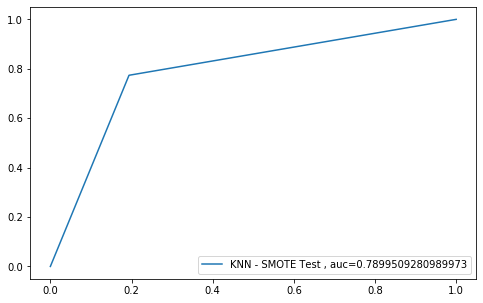

In [237]:
fpr_KNN_sm, tpr_KNN_sm, thresholds_KNN_sm = metrics.roc_curve(Y_test, Y_test_pred_KNN_sm)
auc_KNN_test_sm = metrics.roc_auc_score(Y_test, Y_test_pred_KNN_sm)
plt.plot(fpr_KNN_sm,tpr_KNN_sm,label="KNN - SMOTE Test , auc="+str(auc_KNN_test_sm))
plt.legend(loc=4)
plt.show()

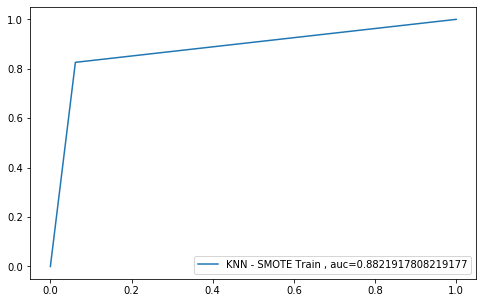

In [236]:
fpr_KNN_train_sm, tpr_KNN_train_sm, thresholds_KNN_train_sm = metrics.roc_curve(y_train_res, Y_train_pred_KNN_sm)
auc_KNN_train_sm = metrics.roc_auc_score(y_train_res, Y_train_pred_KNN_sm)
plt.plot(fpr_KNN_train_sm,tpr_KNN_train_sm,label="KNN - SMOTE Train , auc="+str(auc_KNN_train_sm))
plt.legend(loc=4)
plt.show()

# SVM

In [248]:
from sklearn.svm import SVC
SVM_Model = SVC(kernel='linear')


In [249]:
SVM_Model.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [250]:
Y_test_pred_SVM = SVM_Model.predict(X_test)
Y_train_pred_SVM = SVM_Model.predict(X_train)

In [253]:
SVM_score_train = SVM_Model.score(X_train,Y_train)
SVM_score_test = SVM_Model.score(X_test,Y_test)

print("Model Score for Test Data ", SVM_score_test)
print("Model Score for Train Data ", SVM_score_train)
print("---------------------Test SVM Model -------------------------")
print(metrics.confusion_matrix(Y_test, Y_test_pred_SVM))
print(metrics.classification_report(Y_test, Y_test_pred_SVM))
print("---------------------Train SVM Model -------------------------")
print(metrics.confusion_matrix(Y_train, Y_train_pred_SVM))
print(metrics.classification_report(Y_train, Y_train_pred_SVM))


Model Score for Test Data  0.8618421052631579
Model Score for Train Data  0.8265786993402451
---------------------Test SVM Model -------------------------
[[ 95  34]
 [ 29 298]]
              precision    recall  f1-score   support

           0       0.77      0.74      0.75       129
           1       0.90      0.91      0.90       327

    accuracy                           0.86       456
   macro avg       0.83      0.82      0.83       456
weighted avg       0.86      0.86      0.86       456

---------------------Train SVM Model -------------------------
[[221 110]
 [ 74 656]]
              precision    recall  f1-score   support

           0       0.75      0.67      0.71       331
           1       0.86      0.90      0.88       730

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.82      0.83      0.82      1061



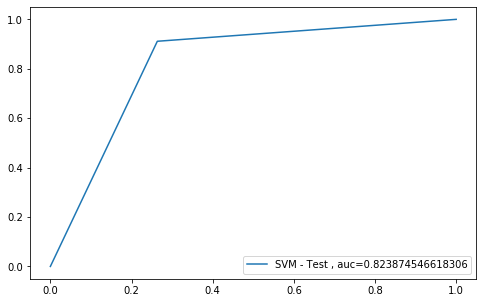

In [254]:
fpr_SVM, tpr_SVM, thresholds_SVM = metrics.roc_curve(Y_test, Y_test_pred_SVM)
auc_SVM_test = metrics.roc_auc_score(Y_test, Y_test_pred_SVM)
plt.plot(fpr_SVM,tpr_SVM,label="SVM - Test , auc="+str(auc_SVM_test))
plt.legend(loc=4)
plt.show()

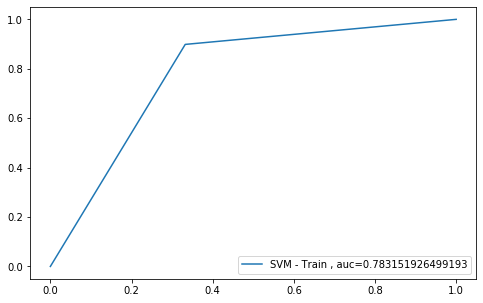

In [256]:
fpr_SVM_train, tpr_SVM_train, thresholds_SVM_train = metrics.roc_curve(Y_train, Y_train_pred_SVM)
auc_SVM_train = metrics.roc_auc_score(Y_train, Y_train_pred_SVM)
plt.plot(fpr_SVM_train,tpr_SVM_train,label="SVM - Train , auc="+str(auc_SVM_train))
plt.legend(loc=4)
plt.show()

# SVM- SMOTE

In [257]:
SVM_Model_sm = SVC(kernel='linear')


In [258]:
Y_test_pred_SVM_sm = SVM_Model.predict(X_test)
Y_train_pred_SVM_sm = SVM_Model.predict(x_train_res)

In [259]:
SVM_score_train_sm = SVM_Model.score(x_train_res,y_train_res)
SVM_score_test_sm = SVM_Model.score(X_test,Y_test)

print("Model Score for Test Data ", SVM_score_test_sm)
print("Model Score for Train Data ", SVM_score_train_sm)
print("---------------------Test SVM Model SMOTE-------------------------")
print(metrics.confusion_matrix(Y_test, Y_test_pred_SVM_sm))
print(metrics.classification_report(Y_test, Y_test_pred_KNN_sm))
print("---------------------Train SVM Model SMOTE-------------------------")
print(metrics.confusion_matrix(y_train_res, Y_train_pred_SVM_sm))
print(metrics.classification_report(y_train_res, Y_train_pred_SVM_sm))


Model Score for Test Data  0.8618421052631579
Model Score for Train Data  0.7924657534246575
---------------------Test SVM Model SMOTE-------------------------
[[ 95  34]
 [ 29 298]]
              precision    recall  f1-score   support

           0       0.58      0.81      0.68       129
           1       0.91      0.77      0.84       327

    accuracy                           0.78       456
   macro avg       0.75      0.79      0.76       456
weighted avg       0.82      0.78      0.79       456

---------------------Train SVM Model SMOTE-------------------------
[[501 229]
 [ 74 656]]
              precision    recall  f1-score   support

           0       0.87      0.69      0.77       730
           1       0.74      0.90      0.81       730

    accuracy                           0.79      1460
   macro avg       0.81      0.79      0.79      1460
weighted avg       0.81      0.79      0.79      1460



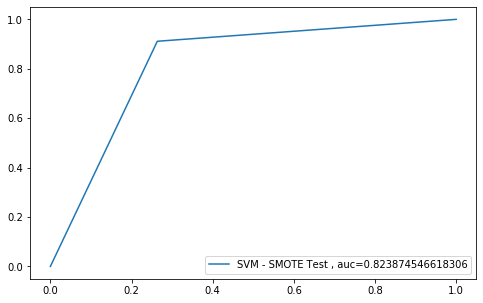

In [260]:
fpr_SVM_sm, tpr_SVM_sm, thresholds_SVM_sm = metrics.roc_curve(Y_test, Y_test_pred_SVM_sm)
auc_SVM_test_sm = metrics.roc_auc_score(Y_test, Y_test_pred_SVM_sm)
plt.plot(fpr_SVM_sm,tpr_SVM_sm,label="SVM - SMOTE Test , auc="+str(auc_SVM_test_sm))
plt.legend(loc=4)
plt.show()

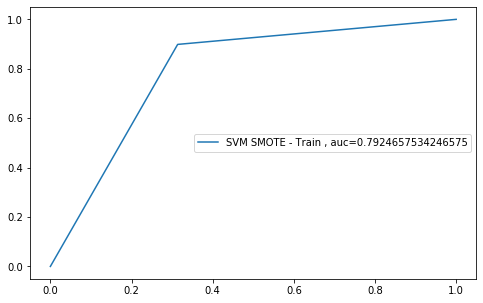

In [262]:
fpr_SVM_train_sm, tpr_SVM_train_sm, thresholds_SVM_train_sm = metrics.roc_curve(y_train_res, Y_train_pred_SVM_sm)
auc_SVM_train_sm = metrics.roc_auc_score(y_train_res, Y_train_pred_SVM_sm)
plt.plot(fpr_SVM_train_sm,tpr_SVM_train_sm,label="SVM SMOTE - Train , auc="+str(auc_SVM_train_sm))
plt.legend(loc=5)
plt.show()

# Compare - Find the best Model

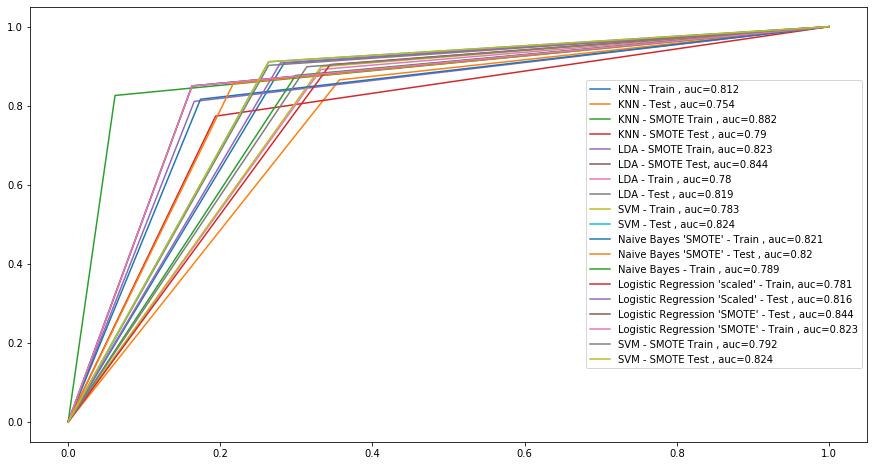

In [306]:
plt.figure(figsize=(15,8))
plt.plot(fpr_KNN_train,tpr_KNN_train,label="KNN - Train , auc="+str(auc_KNN_train.round(3)))
plt.plot(fpr_KNN,tpr_KNN,label="KNN - Test , auc="+str(auc_KNN_test.round(3)))
plt.plot(fpr_KNN_train_sm,tpr_KNN_train_sm,label="KNN - SMOTE Train , auc="+str(auc_KNN_train_sm.round(3)))
plt.plot(fpr_KNN_sm,tpr_KNN_sm,label="KNN - SMOTE Test , auc="+str(auc_KNN_test_sm.round(3)))
plt.plot(fpr_LDA_train_sm,tpr_LDA_train_sm,label="LDA - SMOTE Train, auc="+str(auc_LDA_train_sm.round(3)))
plt.plot(fpr_LDA_sm,tpr_LDA_sm,label="LDA - SMOTE Test, auc="+str(auc_LDA_test_sm.round(3)))
plt.plot(fpr_LDA_train,tpr_LDA_train,label="LDA - Train , auc="+str(auc_LDA_train.round(3)))
plt.plot(fpr_LDA,tpr_LDA,label="LDA - Test , auc="+str(auc_LDA_test.round(3)))
plt.plot(fpr_SVM_train,tpr_SVM_train,label="SVM - Train , auc="+str(auc_SVM_train.round(3)))
plt.plot(fpr_SVM,tpr_SVM,label="SVM - Test , auc="+str(auc_SVM_test.round(3)))
plt.plot(fpr_NB_sm_train,tpr_NB_sm_train,label="Naive Bayes 'SMOTE' - Train , auc="+str(auc_NB_train_sm.round(3)))
plt.plot(fpr_NB_sm,tpr_NB_sm,label="Naive Bayes 'SMOTE' - Test , auc="+str(auc_NB_test_sm.round(3)))
plt.plot(fpr_NB_train,tpr_NB_train,label="Naive Bayes - Train , auc="+str(auc_NB_train.round(3)))
plt.plot(fpr_LR_train_s,tpr_LR_train_s,label="Logistic Regression 'scaled' - Train, auc="+str(auc_LR_tain_s.round(3)))
plt.plot(fpr_LR,tpr_LR,label="Logistic Regression 'Scaled' - Test , auc="+str(auc_LR_test_s.round(3)))
plt.plot(fpr_LR_sm,tpr_LR_sm,label="Logistic Regression 'SMOTE' - Test , auc="+str(auc_LR_test_sm.round(3)))
plt.plot(fpr_LR_sm,tpr_LR_sm,label="Logistic Regression 'SMOTE' - Train , auc="+str(auc_LR_train_sm.round(3)))

plt.plot(fpr_SVM_train_sm,tpr_SVM_train_sm,label="SVM - SMOTE Train , auc="+str(auc_SVM_train_sm.round(3)))
plt.plot(fpr_SVM_sm,tpr_SVM_sm,label="SVM - SMOTE Test , auc="+str(auc_SVM_test_sm.round(3)))
plt.legend(loc=5)

plt.show()

# Bagging - Random Forest

In [298]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clfRF=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clfRF.fit(X_train,Y_train)

y_pred_test_RF=clfRF.predict(X_test)
model_scoreRF = clfRF.score(X_train,Y_train)

In [299]:
print(model_scoreRF)
print(metrics.confusion_matrix(Y_test, y_pred_test_RF))

0.9990574929311969
[[ 90  39]
 [ 33 294]]


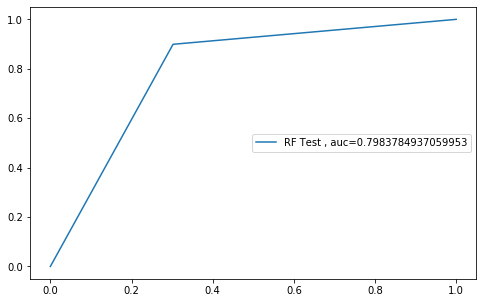

In [300]:
fpr_RF, tpr_RF, thresholds_RF = metrics.roc_curve(Y_test, y_pred_test_RF)
auc_RF = metrics.roc_auc_score(Y_test, y_pred_test_RF)
plt.plot(fpr_RF,tpr_RF,label="RF Test , auc="+str(auc_RF))
plt.legend(loc=5)
plt.show()

# Boosting - AdaBoost 

In [309]:
from sklearn.ensemble import AdaBoostClassifier


clfADB = AdaBoostClassifier(n_estimators=100)
clfADB.fit(X_train,Y_train)

y_pred_test_ADA=clfADB.predict(X_test)
model_scoreADB = clfADB.score(X_test, Y_test)

print(model_scoreADB)
print(metrics.confusion_matrix(Y_test, y_pred_test_ADA))

0.8596491228070176
[[ 93  36]
 [ 28 299]]


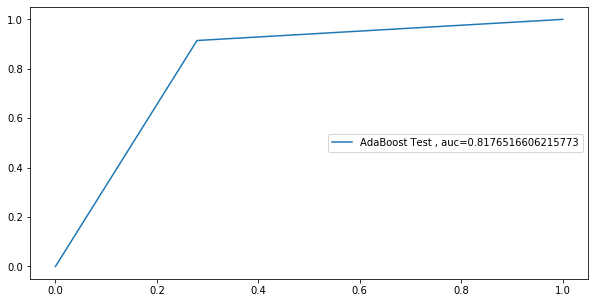

In [331]:
fpr_ADA, tpr_ADA, thresholds_ADA = metrics.roc_curve(Y_test, y_pred_test_ADA)
auc_ADA = metrics.roc_auc_score(Y_test, y_pred_test_ADA)
plt.plot(fpr_ADA,tpr_ADA,label="AdaBoost Test , auc="+str(auc_ADA))
plt.legend(loc=5)
plt.show()